In [19]:
####################################l'import des bibliothèques##########################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
## bayesien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# logistic regression 
from sklearn.linear_model import LogisticRegression 
# l'assurance de l'équilibre du dataset ( dealing with imbalanced data)
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# le centrage des données 
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import decomposition
from sklearn.preprocessing import OrdinalEncoder
#################################### l'import des bibliothèques ##########################################################

In [2]:
######################################fonction de normalisation########################################################

def normalisation(dataframe):
    x = dataframe.iloc[:, :-1].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataframe = pd.DataFrame(x_scaled,columns=["V1","V2"])
    return dataframe

######################################fonction de normalisation#######################################################

In [5]:
 ######################################## KNN ####################################################################

def knn(data,s):
    
    X = s.values
    # la variable classe " type d'appartenance"
    y = data.iloc[:, -1].values
    # création des données de test et d'entrainement

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    # Le choix du k 
    error = []

    # Calcul des erreurs en k variant 
    for i in range(1, 40):
        print(i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

    print("le nombre de k idéal est l'un des valeur de la liste indice +1")   
    indices = [i for i, x in enumerate(error) if x == min(error)]
    print(indices)
    print("par choix nous avons pris le plus grand ")
    print(int(indices[-1])+1)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')

In [6]:
######################################### bayesien naif###########################################################

def bayesien_naif(data,s):
    #On sépare les données et les classes
    x = s
    y = data.iloc[:,-1]
    #On fractionne les datas (train-test)
    x_train, x_test, y_train, y_test = train_test_split(s,y,test_size=0.20,random_state=42)
    print(x_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    print(y_train.shape)
    #On instancie le modèle
    model_Gaussian = GaussianNB()
    
    #Entrainement
    model_Gaussian.fit(x_train, y_train)
    
    #Prédiction
    prediction = model_Gaussian.predict(x_test)
    print(prediction)
    
    #On évalue le model afin de connaitre sa précision, la valeur est donnée entre 0 et 1 (d'où le *100)
    precision = accuracy_score(y_test, prediction)*100
    print(precision)
    

In [7]:
############################### Random forest############################################################
def random_forest(data,s):
    x = s
    print(x)
    y = data.iloc[:,-1]
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4)
    print(x_train)
    print(y_train)
    #n_estimators : le nombre d'arbres générés
    aleatoire = RandomForestClassifier()
    aleatoire.fit(x_train, y_train)
    a=aleatoire.score(x_test, y_test)
    print(a)
    prediction= aleatoire.predict(x_test)
    print('je suis')
    print(prediction)
    cm = confusion_matrix(y_test, prediction)
    print(cm)
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True)
    plt.title('random forest table')
    plt.xlabel('prédit ')
    plt.ylabel('testés')




In [8]:
################################################ LDA ############################################################
print("LDA")
def LDA(data,s):  
    X = s
    y = data.iloc[:,-1]
    lda = LinearDiscriminantAnalysis()
    lda.fit(X,y)
    print(lda.score(X,y))

############################################### LDA #############################################################

############################################### QDA #############################################################
print("QDA")
def QDA(data,s):
    X = s
    y = data.iloc[:,-1]
    qda = QuadraticDiscriminantAnalysis()
    model = qda.fit(X, y)
    print(model.score(X,y))

############################################### QDA #############################################################

############################################## Decision tree ###################################################
print("decision tree")
def decision_tree(data,s):
    x = s
    y = data.iloc[:,-1]
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1)
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

############################################## Decision Tree ###################################################

LDA
QDA
decision tree


In [9]:
########################################## SVM linear #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_Linear(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
########################################## SVM  linear ##########################################################

########################################## SVM non linear  #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_Linear(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))



In [10]:
########################################## Linear reggression ###################################################
def regression_lineaire(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    m = model.score(X_test,y_pred)
    print(m)
######################################### Linear regression ######################################################

In [11]:
######################################## Test sur les données synthétiques #######################################

# La récupération des données 
data_spiral = pd.read_csv("data/spiral.txt", sep="\t")
data_flame =pd.read_csv("data/flame.txt", sep="\t")
data_agg = pd.read_csv("data/flame.txt", sep="\t")

# la normalisation des données 
norm_spiral= normalisation(data_spiral)
norm_flame= normalisation(data_flame)
norm_agg=normalisation(data_agg)


---------------------Etude exploratoire préliminaire---------------------


Spiral
            31.95        7.95
count  311.000000  311.000000
mean    18.364630   16.371704
std      7.270992    6.861701
min      3.000000    2.900000
25%     12.875000   11.375000
50%     18.200000   16.050000
75%     23.275000   21.425000
max     31.650000   31.650000
Flame
             1.85        27.8
count  239.000000  239.000000
mean     7.346653   20.899791
std      3.189473    3.360983
min      0.500000   14.450000
25%      5.275000   18.225000
50%      7.300000   20.700000
75%      9.325000   23.525000
max     14.200000   27.600000
Aggregation
             1.85        27.8
count  239.000000  239.000000
mean     7.346653   20.899791
std      3.189473    3.360983
min      0.500000   14.450000
25%      5.275000   18.225000
50%      7.300000   20.700000
75%      9.325000   23.525000
max     14.200000   27.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x24731d56700>,
 'caps': [<matplotlib.lines.Line2D at 0x24731d56dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24731d563a0>,
 'medians': [<matplotlib.lines.Line2D at 0x24731d634c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24731d63820>,
 'means': []}

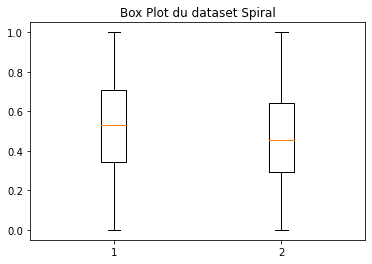

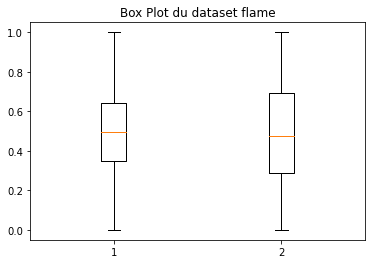

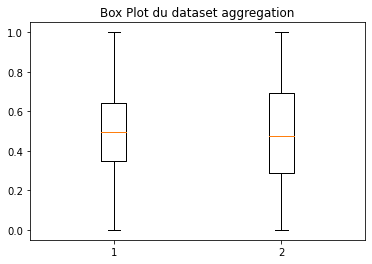

In [12]:
####################################### étude exploratoire préliminaire #############################################

print("---------------------Etude exploratoire préliminaire---------------------\n\n")
print("Spiral")
print(data_spiral.iloc[:, :-1].describe())

print("Flame")
print(data_flame.iloc[:, :-1].describe())

print("Aggregation")
print(data_agg.iloc[:, :-1].describe())



#box plot de chaque dataset 

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset Spiral')
ax1.boxplot(norm_spiral)
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot du dataset flame')
ax2.boxplot(norm_flame)
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot du dataset aggregation')
ax3.boxplot(norm_agg)

####################################### étude exploratoire préliminaire #############################################

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
le nombre de k idéal est l'un des valeur de la liste indice +1
[0, 1, 2, 3, 4, 6]
par choix nous avons pris le plus grand 
7
(248, 2)
(63, 2)
(63,)
(248,)
[3 3 2 2 3 2 1 2 2 2 2 3 3 3 3 3 1 3 3 3 2 1 1 3 2 3 1 3 3 1 1 1 1 1 1 1 2
 3 2 1 2 3 2 2 3 2 2 1 3 2 1 2 1 1 2 2 3 2 2 2 2 3 1]
30.158730158730158
           V1        V2
0    0.982548  0.153043
1    0.958115  0.130435
2    0.931937  0.107826
3    0.904014  0.092174
4    0.874346  0.073043
..        ...       ...
306  0.445026  0.380870
307  0.441536  0.387826
308  0.441536  0.394783
309  0.441536  0.403478
310  0.441536  0.406957

[311 rows x 2 columns]
           V1        V2
259  0.849913  0.563478
63   0.493892  0.725217
237  0.492147  0.864348
246  0.710297  0.791304
155  0.525305  0.151304
..        ...       ...
139  0.872600  0.250435
212  0.000000  0.424348
189  0.376963  0.561739
97   0.668412  0.440000
160  0.432810

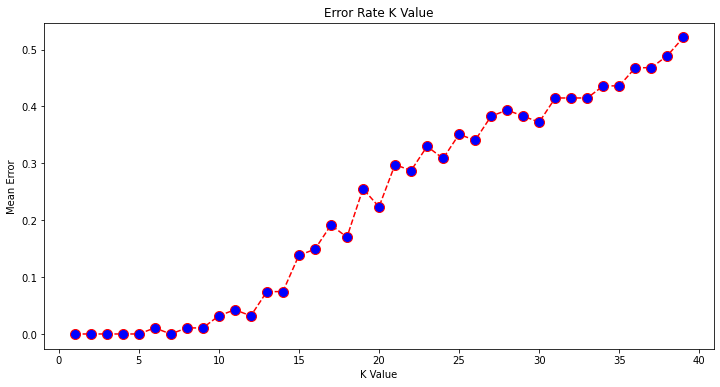

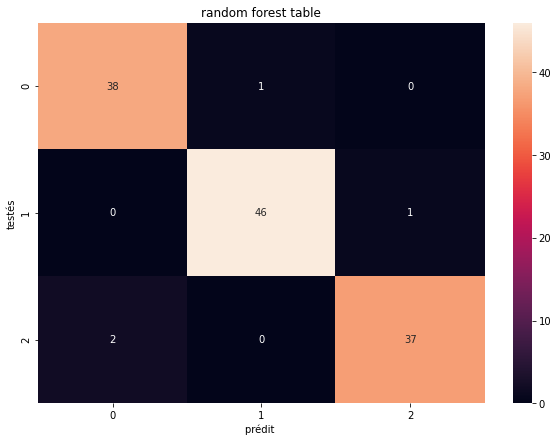

In [13]:
############################### La comparaison des méthodes sur le dataset Spiral ##################################

knn(data_spiral,norm_spiral)
bayesien_naif(data_spiral,norm_spiral)
random_forest(data_spiral,norm_spiral)
decision_tree(data_spiral,norm_spiral)
LDA(data_spiral,norm_spiral)
QDA(data_spiral,norm_spiral)
SVM_Linear(data_spiral,norm_spiral)
regression_lineaire(data_spiral, norm_spiral)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
le nombre de k idéal est l'un des valeur de la liste indice +1
[0, 2, 3, 7, 11, 17, 18, 19, 21, 23, 29, 30, 31, 32, 33, 34, 35, 36, 37]
par choix nous avons pris le plus grand 
38
(191, 2)
(48, 2)
(48,)
(191,)
[2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 2 2 1 2 1 1 2 1 1 2 2 1 2 1 2 2 1
 2 2 1 1 2 2 2 2 2 1 2]
97.91666666666666
           V1        V2
0    0.062044  0.927757
1    0.065693  0.669202
2    0.025547  0.653992
3    0.000000  0.600760
4    0.010949  0.524715
..        ...       ...
234  0.510949  0.893536
235  0.510949  0.851711
236  0.478102  0.866920
237  0.467153  0.965779
238  0.412409  0.946768

[239 rows x 2 columns]
           V1        V2
205  0.635036  0.764259
201  0.638686  0.969582
23   0.215328  0.414449
217  0.496350  0.756654
7    0.105839  0.634981
..        ...       ...
110  0.784672  0.300380
234  0.510949  0.893536
25   0.138686  0.376426
208  0.635036

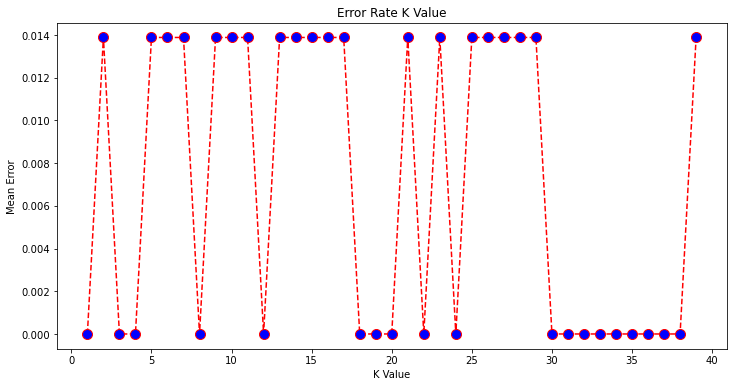

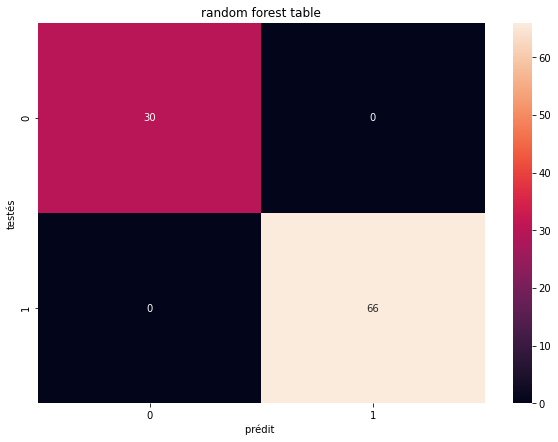

In [14]:
knn(data_flame,norm_flame)
bayesien_naif(data_flame,norm_flame)
random_forest(data_flame,norm_flame)
decision_tree(data_flame,norm_flame)
LDA(data_flame,norm_flame)
QDA(data_flame,norm_flame)
SVM_Linear(data_flame,norm_flame)
regression_lineaire(data_flame,norm_flame)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
le nombre de k idéal est l'un des valeur de la liste indice +1
[16, 18, 30, 31, 32, 33, 34, 35, 36, 37, 38]
par choix nous avons pris le plus grand 
39
(191, 2)
(48, 2)
(48,)
(191,)
[2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 2 2 1 2 1 1 2 1 1 2 2 1 2 1 2 2 1
 2 2 1 1 2 2 2 2 2 1 2]
97.91666666666666
           V1        V2
0    0.062044  0.927757
1    0.065693  0.669202
2    0.025547  0.653992
3    0.000000  0.600760
4    0.010949  0.524715
..        ...       ...
234  0.510949  0.893536
235  0.510949  0.851711
236  0.478102  0.866920
237  0.467153  0.965779
238  0.412409  0.946768

[239 rows x 2 columns]
           V1        V2
122  0.832117  0.425856
224  0.368613  0.885932
39   0.233577  0.140684
173  0.642336  0.574144
183  0.364964  0.726236
..        ...       ...
134  0.952555  0.498099
119  0.726277  0.422053
126  0.817518  0.467681
3    0.000000  0.600760
96   0.726277  0.

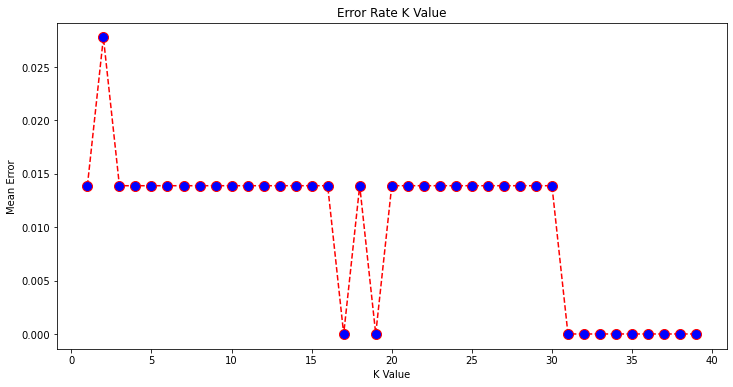

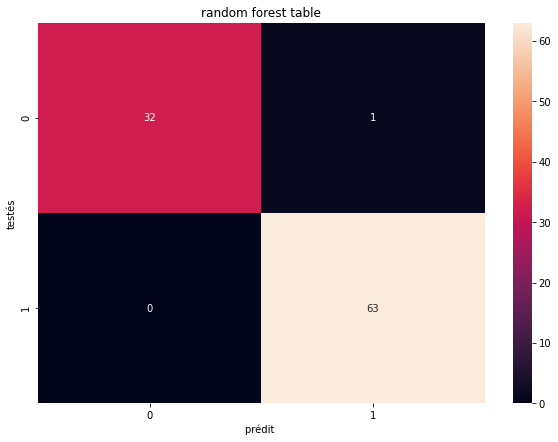

In [15]:
knn(data_agg,norm_agg)
bayesien_naif(data_agg,norm_agg)
random_forest(data_agg,norm_agg)
decision_tree(data_agg,norm_agg)
LDA(data_agg,norm_agg)
QDA(data_agg,norm_agg)
SVM_Linear(data_agg,norm_agg)
regression_lineaire(data_agg,norm_agg)

In [16]:
######################################## Credit Card FRAUDE ####################################################
data_card=pd.read_csv("data/creditcard.csv")

x= data_card['Class'].value_counts()
# dealing with imbalanced data 
# la suppression de la variable temps car elle n'apporte aucune information significative à l'analyse 

data_card = data_card.iloc[:,1:]
# le centrage des données : 

rb = RobustScaler()

data_card['Amount'] = rb.fit_transform(data_card['Amount'].values.reshape(-1,1))
print(data_card)

# l'application du under sampling 
rus = RandomUnderSampler()
x_underS, y_underS= rus.fit_sample(data_card.iloc[:,:-1],data_card.iloc[:,-1])

print(x_underS)
# l'application du over sampling 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(data_card.iloc[:,:-1],data_card.iloc[:,-1])

print(X_ros)



               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

In [23]:
########################################### VISA PREMIER ######################################################
df_visa = pd.read_csv("data/Visapremier.txt", sep="\t")

#Le jeu de donné ne continet donc pas de valeur NaN
df_visa.isna().values.any() 

#On récupere toutes les valeurs qui ne sont pas numériques
str_var = df_visa.select_dtypes(exclude=np.number).columns.tolist()
str_var

['departem',
 'sexe',
 'sitfamil',
 'csp',
 'codeqlt',
 'agemvt',
 'nbpaiecb',
 'cartevp']

In [27]:
#Outil pour passer de cat en nombre
from sklearn import decomposition
enc = OrdinalEncoder()
df_visa_tr = df_visa.copy()

#on remplace les valeurs categorielles en leur codage numerique
df_visa_tr[str_var]=enc.fit_transform(df_visa[str_var])

#recuperation de la variable à expliquer
Y = df_visa_tr.cartevpr

#suppression de la variable à expliquer (elle existe en double)
df_visa_tr.drop(columns=['cartevp', 'cartevpr'], inplace=True)

# Centrage et Réduction
X_scale = preprocessing.StandardScaler().fit_transform(df_visa_tr)

# Calcul des composantes principales
pca = decomposition.PCA(n_components='mle', svd_solver='full')

pca


PCA(n_components='mle', svd_solver='full')

In [28]:
#Ici on verifie l'importance des composantes extraites par la pca en fonction de leur variance expliquée
plt.plot(pca.explained_variance_ratio_)

#On comprend que les ~20 premiers variables sont importantes et que le reste l'est moins

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'